In [1]:
%matplotlib inline
import copy
import matplotlib.pyplot as plt
from grid2op.Episode import EpisodeData
from grid2op.PlotGrid import PlotMatplot

In [2]:
def plot_grid(this_episode, obs, show=False, path=None):
    plot_helper = PlotMatplot(observation_space=this_episode.observation_space, width=1920, height=1080)
    plot_helper._line_bus_radius = 7
    fig = plot_helper.plot_obs(obs)
    if show:
        plt.show()
        fig.show()
    if not path is None:
        fig.savefig(path)
    plt.close(fig)

In [42]:
#case = "sandbox_TPH_{}".format("vDoNothing") #vMyPTDFAgent
case = "ddqn_tests_sandbox_MyDDQN_10000it"
episode_studied = "0001"
path_save = 'D:\\ESDA_MSc\\Dissertation\\code_stuff\\cases\\{}'.format(case)
this_episode = EpisodeData.from_disk(path_save, episode_studied)

In [65]:
this_episode.episode_times

{'Agent': {'total': 16.005950927734375},
 'Env': {'apply_act': 6.40425705909729,
  'observation_computation': 0.42595696449279785,
  'powerflow_computation': 15.197261333465576,
  'total': 22.027475357055664},
 'total': 38.59935212135315}

In [70]:
import numpy as np
np.sum(this_episode.disc_lines[0:this_episode.meta['nb_timestep_played']], axis=1)

KeyError: 'nb_timestep_payed'

In [69]:
obs = copy.deepcopy(this_episode.observations[-1])
obs.gen_pmin

array([0., 0., 0., 0., 0., 0.], dtype=float32)

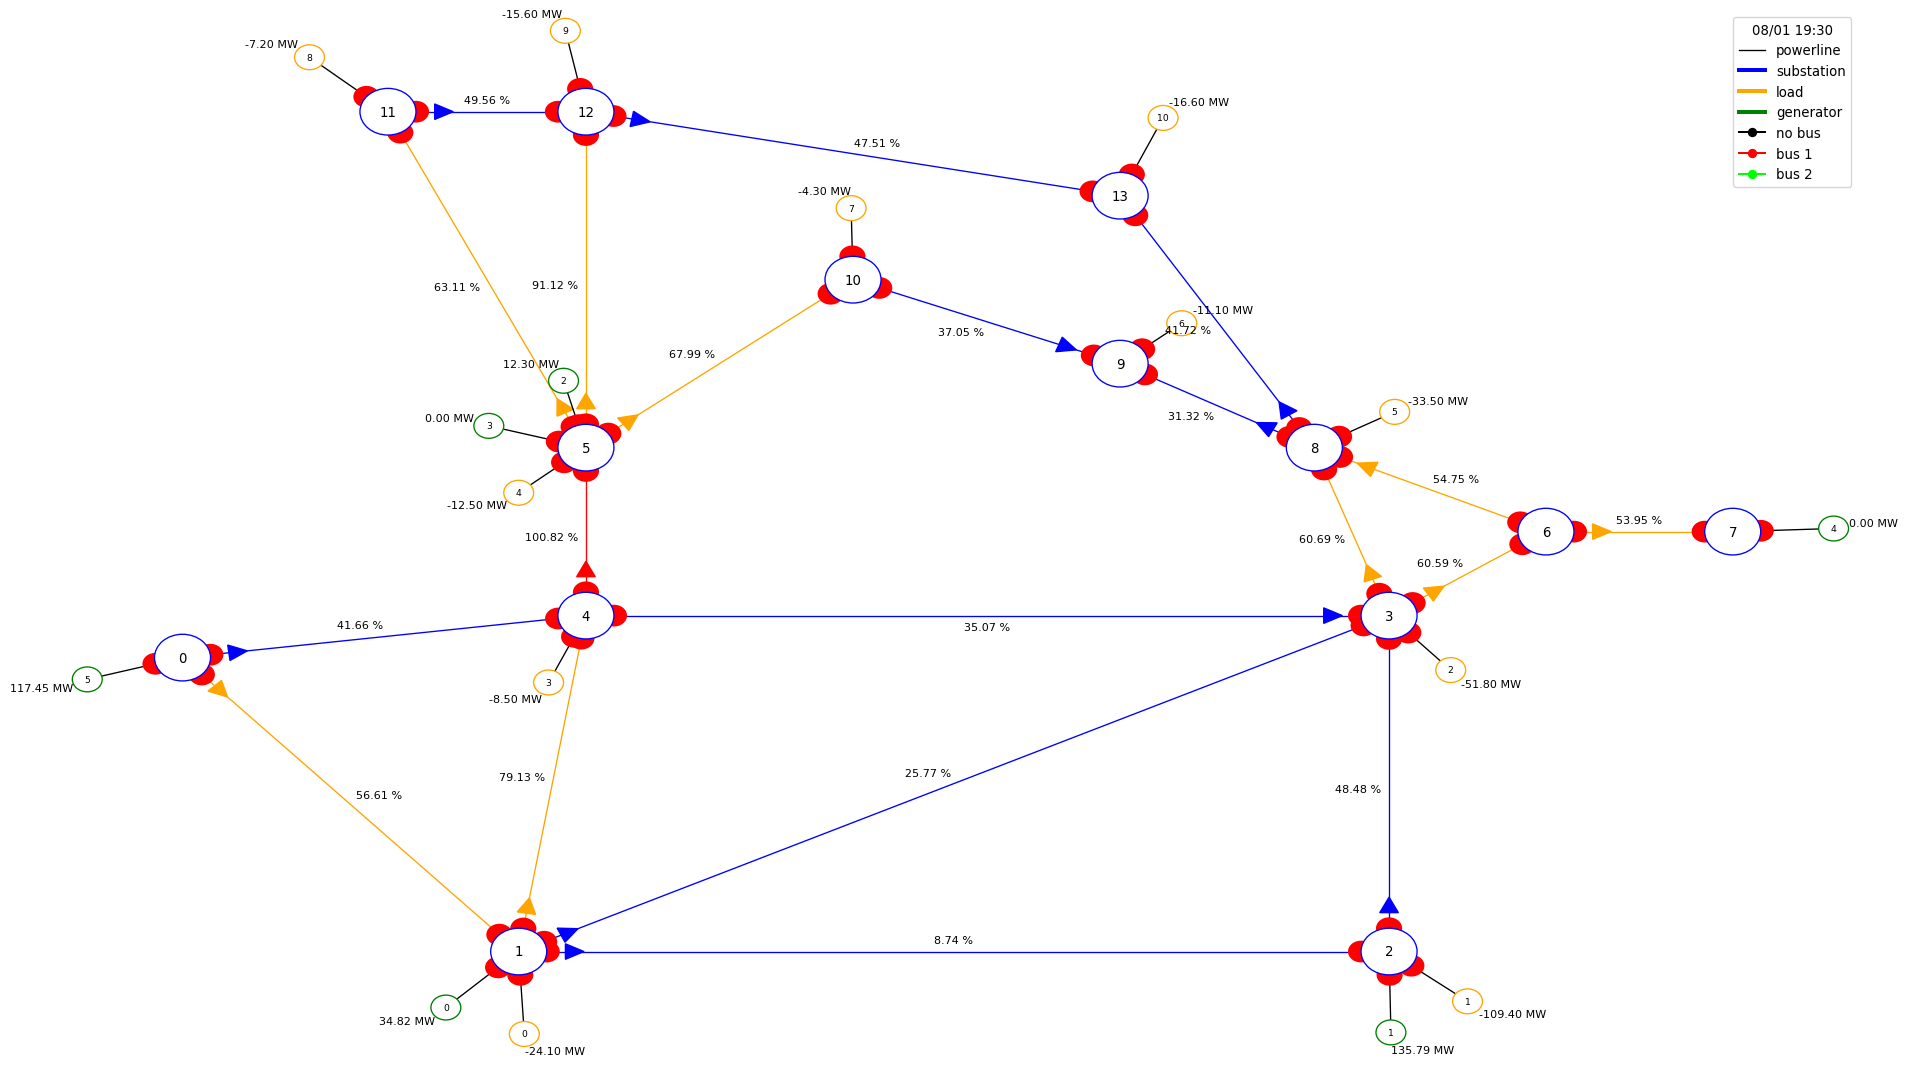

In [46]:
obs = copy.deepcopy(this_episode.observations[-1])
plot_grid(this_episode, obs, show=True)

In [10]:
obs.gen_pmax

array([140., 120.,  70.,  70.,  40., 100.], dtype=float32)

In [6]:
#case2 = "14_redisp_{}".format("vDoNothing")
case2 = "ddqn_tests_sandbox_vDoNothing"
episode_studied2 = "0000"
path_save2 = 'D:\\ESDA_MSc\\Dissertation\\code_stuff\\cases\\{}'.format(case2)
this_episode2 = EpisodeData.from_disk(path_save2, episode_studied2)

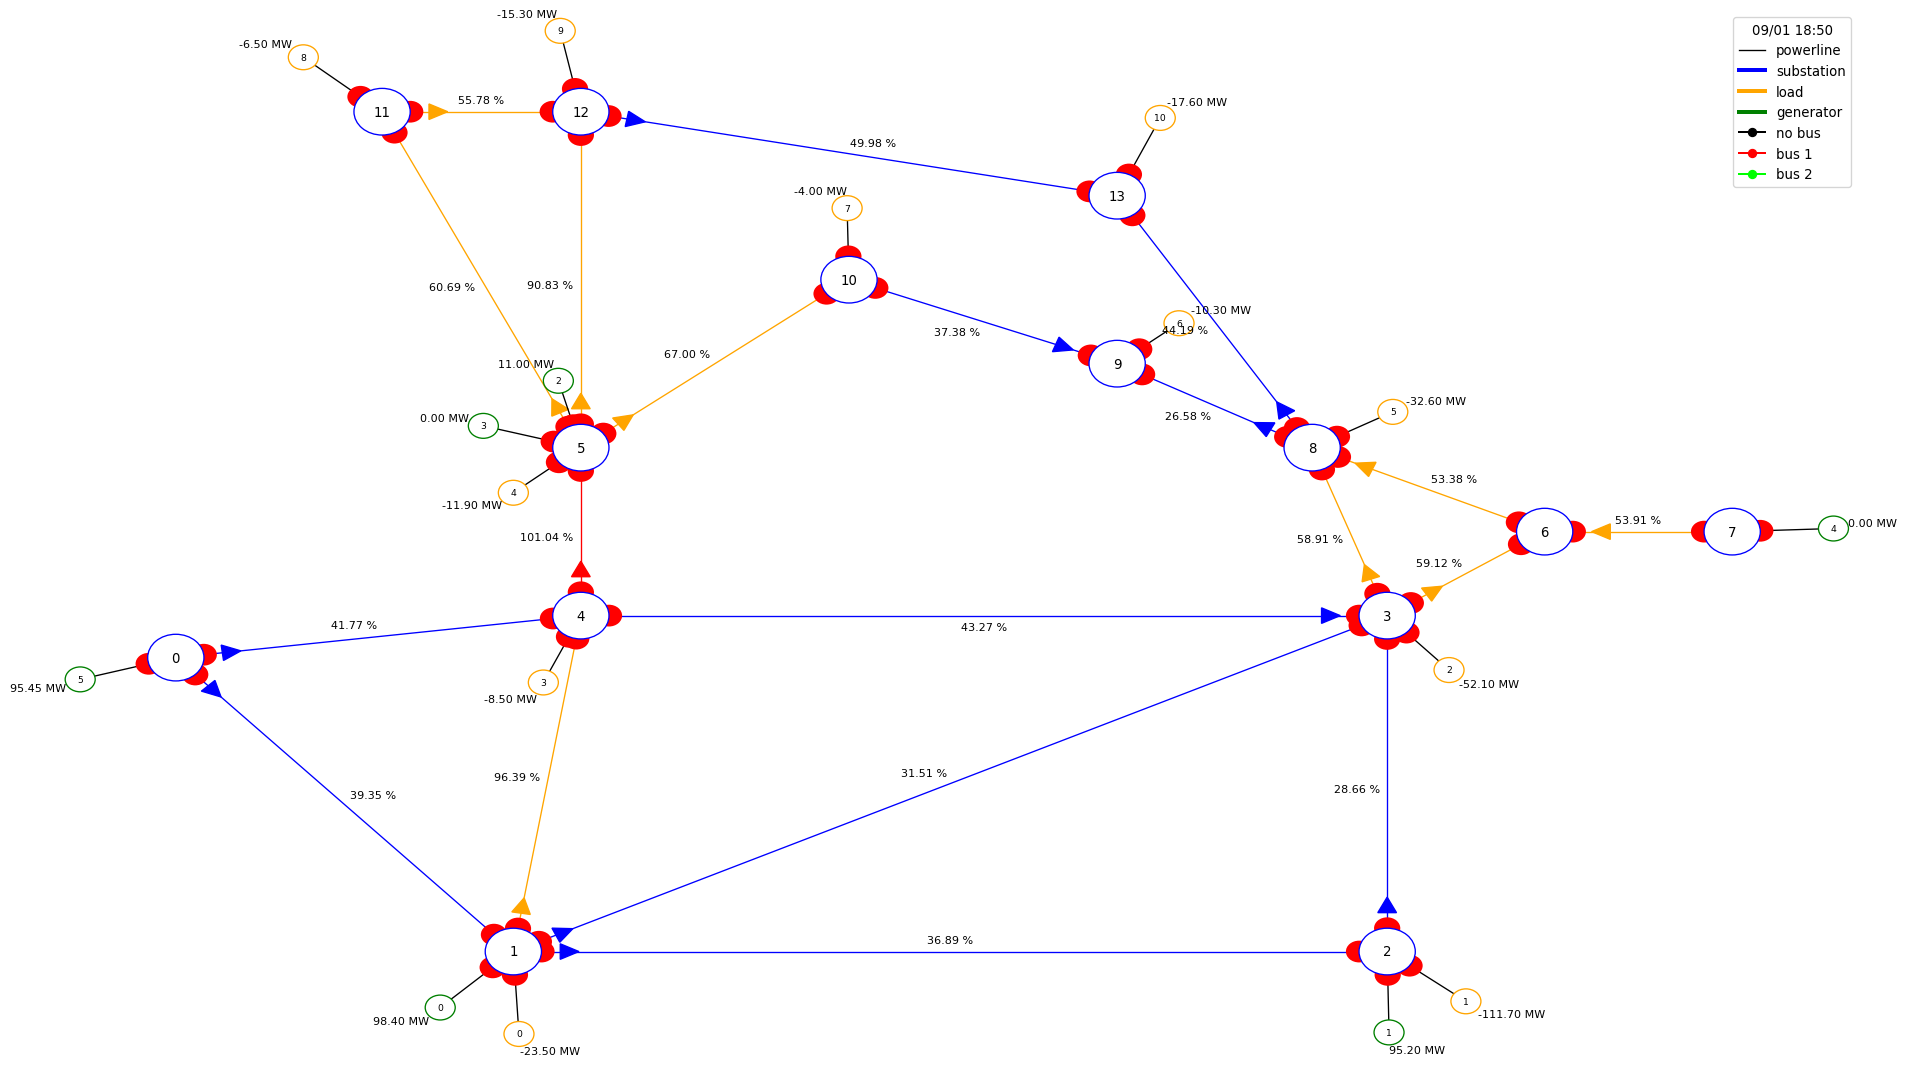

In [14]:
obs2 = copy.deepcopy(this_episode2.observations[-1])
plot_grid(this_episode2, obs2, show=True)

In [79]:
len(this_episode2.observations) - 7262

803

In [71]:
len(this_episode.observations) - 2018

803

# Actions

In [84]:
acts = copy.deepcopy(this_episode.actions[-1])

In [12]:
for reversed_ts in [0, 1, 2, 3]:
    print("---{}---".format(reversed_ts))
    obss = copy.deepcopy(this_episode.observations[reversed_ts])
    actt = copy.deepcopy(this_episode.actions[reversed_ts-1])
    print("flows: \n{}".format(obss.rho))
    print("actions: \n{}".format(actt.as_dict()))

---0---
flows: 
[0.3411959  0.38001817 0.2741563  0.28502724 0.89254946 0.30820453
 0.34710178 0.5555636  0.5163097  0.768644   0.3543126  0.42821708
 0.3071312  0.4712274  0.42094678 0.57809067 0.5725074  1.0282083
 0.4782696  0.4986009 ]
actions: 
{}
---1---
flows: 
[0.35035402 0.38241452 0.28405726 0.28517547 0.89071506 0.29757872
 0.35200867 0.5573785  0.51886135 0.77136505 0.34452716 0.42449933
 0.3102641  0.4688086  0.42111835 0.57443583 0.56869894 1.0245516
 0.4795164  0.49670908]
actions: 
{}
---2---
flows: 
[0.36695626 0.38717085 0.28752327 0.28544796 0.8889614  0.29391834
 0.3575299  0.55121696 0.5167594  0.76667345 0.34443617 0.4243942
 0.30539474 0.46213156 0.41655433 0.5728867  0.56611717 1.0209098
 0.47497416 0.49241912]
actions: 
{}
---3---
flows: 
[0.36695626 0.38717085 0.28752327 0.28544796 0.8889614  0.29391834
 0.3575299  0.55121696 0.5167594  0.76667345 0.34443617 0.4243942
 0.30539474 0.46213156 0.41655433 0.5728867  0.56611717 1.0209098
 0.47497416 0.49241912]
act

In [97]:
for i in range(500):
    a = this_episode.actions[i].as_dict()
    if not a:
        continue
    else:
        print(i) 

379
381
382


In [98]:
for ts in [377, 378, 379, 380, 381, 382]:
    print("---{}---".format(ts))
    obss = copy.deepcopy(this_episode.observations[ts])
    actt = copy.deepcopy(this_episode.actions[ts])
    print("flows: \n{}".format(obss.rho))
    print("actions: \n{}".format(actt.as_dict()))

---377---
flows: 
[0.9077451  0.74634594 0.08380599 0.6458     0.18901864 0.
 0.3350338  0.604302   0.77114445 0.         0.55253637 0.34762487
 0.24850507 0.09866665 0.         0.3763542  0.28463873 0.71053034
 0.35700423 0.7174461 ]
actions: 
{'redispatch': array([ 0.,  0.,  0.,  0., 10.], dtype=float32)}
---378---
flows: 
[0.90796304 0.7479381  0.08346985 0.64216554 0.19054852 0.
 0.33261234 0.6081431  0.77448994 0.         0.55535626 0.35220352
 0.24982613 0.09711898 0.         0.3737889  0.2833688  0.7039204
 0.3581407  0.71618044]
actions: 
{'redispatch': array([ 0.,  0.,  0.,  0., 10.], dtype=float32)}
---379---
flows: 
[0.93165284 0.75560194 0.08450273 0.638745   0.18747827 0.
 0.33345863 0.6135105  0.77718914 0.         0.5543526  0.35513347
 0.24674284 0.09895412 0.         0.3747942  0.2830471  0.7103244
 0.35444832 0.71287006]
actions: 
{'redispatch': array([ 0.,  0.,  0.,  0., 10.], dtype=float32)}
---380---
flows: 
[0.8959015  0.74580145 0.08375215 0.63740385 0.18688105 0

In [104]:
a = copy.deepcopy(this_episode.observations[-2017].line_status)
hex(int(''.join(['1' if x else '0' for x in a]), 2))

'0xfbbdf'